## Problem Overview

Our task focuses on understanding factors contributing to lung cancer. We are provided with the following data points for 10,000 individuals:

- **Age**: The person's age. Since lung cancer risk increases with age, we did not include any individuals younger than 40.

- **Relative Genetic Risk**: A genotyping test score estimating the individual's genetic predisposition to lung cancer compared to an "average" person.

- **Education**: The individual's highest obtained education level.

- **Pack Years Smoked**: A medical metric that quantifies smoking history. For example, smoking 20 cigarettes per day for 10 years equals 10 pack years (1 pack = 20 cigarettes). 

- **Years Clean**: The number of years since the individual quit smoking. For those who have never smoked, this is equal to their age.

- **Relative Air Pollution**: An estimate of the individual's exposure to air pollution, a known environmental risk factor for lung cancer.

- **Lung Cancer**: Binary outcome indicating whether the person has lung cancer based on an infallible supertest (1 = yes, 0 = no).

**Your goal** is to find out how much the different factors listed above contribute to an individuals risk of developing lung cancer. 

In [3]:
import pandas as pd

# Tarmo: Let's take a sample of n=1000 to make life easier :). Feel free to revert back to full dataset when you've decided on your model.
df = pd.read_csv('lung_cancer.tsv',sep='\t')#.sample(1000) 

df.head()

,age,relative_genetic_risk,education,smoking_status,pack_years_smoked,years_clean,relative_air_pollution,lung_cancer
0,53,0.32,High school graduate,Current smoker,27,0,0.34,0
1,42,1.05,High school graduate,Current smoker,32,0,2.78,0
2,41,0.58,Master's degree,Never smoked,0,41,1.22,0
3,43,3.53,High school graduate,Current smoker,20,0,1.83,0
4,66,1.35,Bachelor's degree or vocational degree,Never smoked,0,66,0.67,0


# Analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az, matplotlib.pyplot as plt
import bambi as bmb

# DAG

<img src="DAG_lung_cancer.png">

# Bambi

In [12]:
model = bmb.Model(
    'lung_cancer ~ age + relative_genetic_risk + education + pack_years_smoked + years_clean + relative_air_pollution',
    df,
    family='bernoulli',
)

model
result = model.fit(idata_kwargs={"log_likelihood": True})

Sampling 4 chains, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:01:49

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 321 seconds.


In [29]:
#model.graph()

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'relative_genetic_risk'}>,
        <Axes: title={'center': 'relative_genetic_risk'}>],
       [<Axes: title={'center': 'education\nBasic education or lower'}>,
        <Axes: title={'center': 'education\nBasic education or lower'}>],
       [<Axes: title={'center': 'education\nHigh school graduate'}>,
        <Axes: title={'center': 'education\nHigh school graduate'}>],
       [<Axes: title={'center': "education\nMaster's degree"}>,
        <Axes: title={'center': "education\nMaster's degree"}>],
       [<Axes: title={'center': 'education\nPhD'}>,
        <Axes: title={'center': 'education\nPhD'}>],
       [<Axes: title={'center': 'pack_years_smoked'}>,
        <Axes: title={'center': 'pack_years_smoked'}>],
       [<Axes: title={'center': 'years_clean'}>,
        <Axes: title={'center':

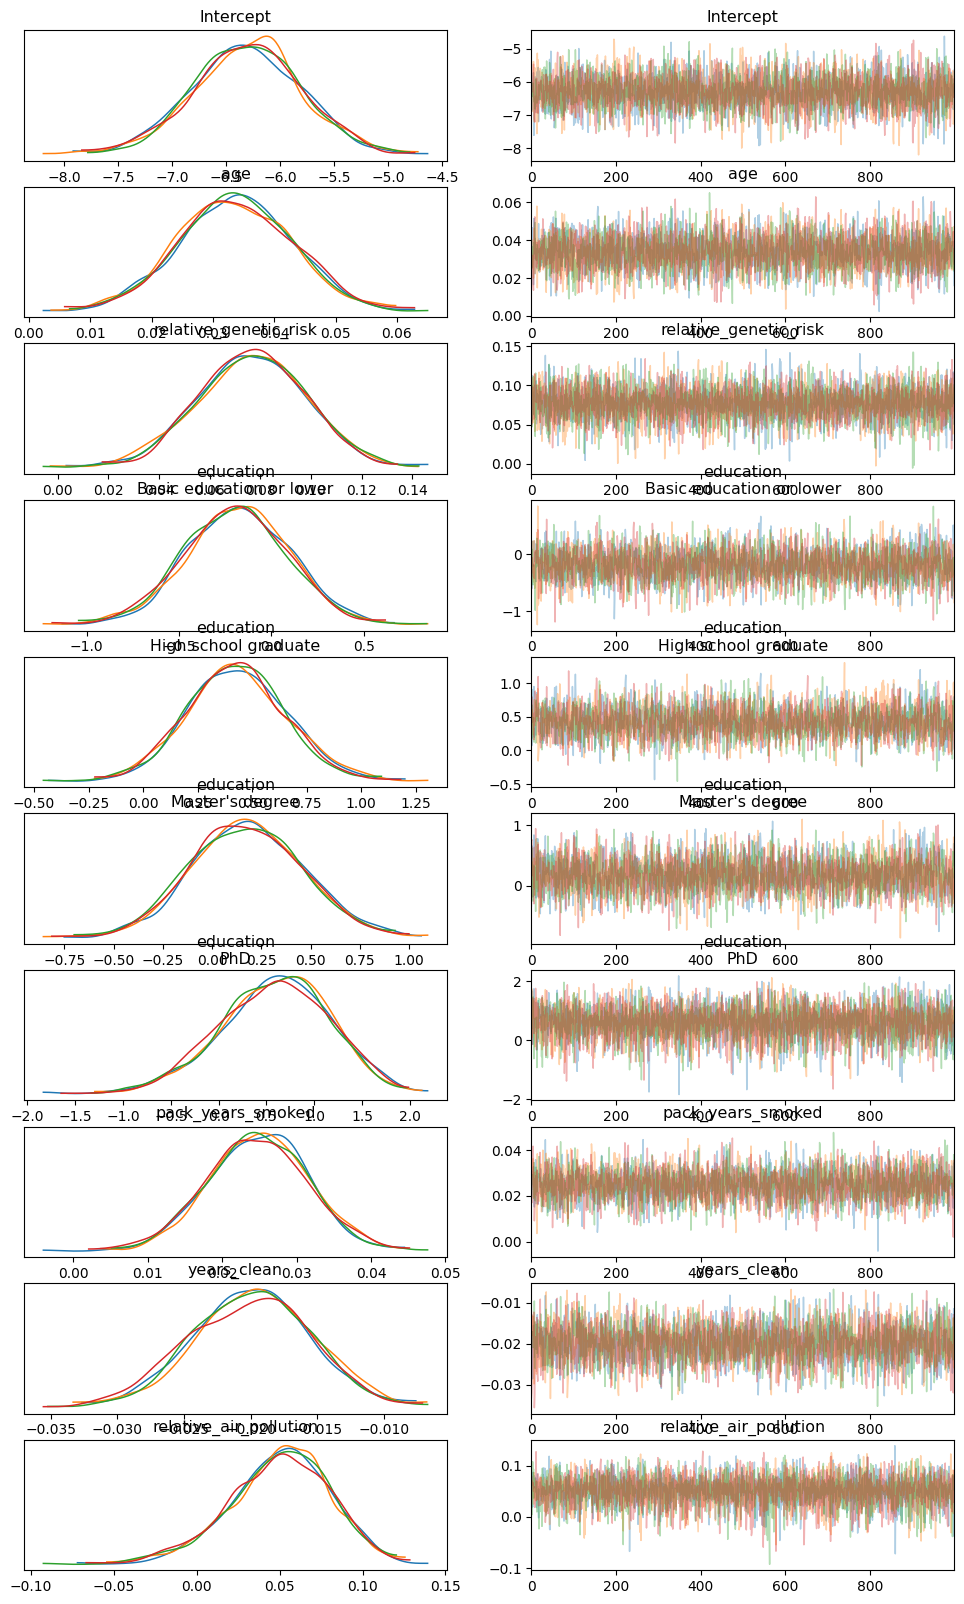

In [17]:
az.plot_trace(result, compact=False)

In [19]:
az.summary(result)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-6.307,0.506,-7.240,-5.324,0.007,0.005,5022.0,3230.0,1.0
age,0.034,0.009,0.016,0.051,0.000,0.000,4543.0,3272.0,1.0
relative_genetic_risk,0.077,0.021,0.038,0.118,0.000,0.000,6643.0,3142.0,1.0
education[Basic education or lower],-0.187,0.278,-0.707,0.333,0.005,0.003,3607.0,3086.0,1.0
education[High school graduate],0.429,0.226,0.021,0.874,0.004,0.003,3269.0,2829.0,1.0
education[Master's degree],0.178,0.282,-0.358,0.702,0.005,0.004,3515.0,3058.0,1.0
education[PhD],0.584,0.576,-0.531,1.618,0.008,0.006,5666.0,3079.0,1.0
pack_years_smoked,0.025,0.007,0.013,0.038,0.000,0.000,3807.0,3248.0,1.0
years_clean,-0.020,0.004,-0.028,-0.012,0.000,0.000,3479.0,3043.0,1.0
relative_air_pollution,0.050,0.030,-0.008,0.105,0.000,0.000,6071.0,2581.0,1.0


In [27]:
#az.plot_forest(result, combined=True)

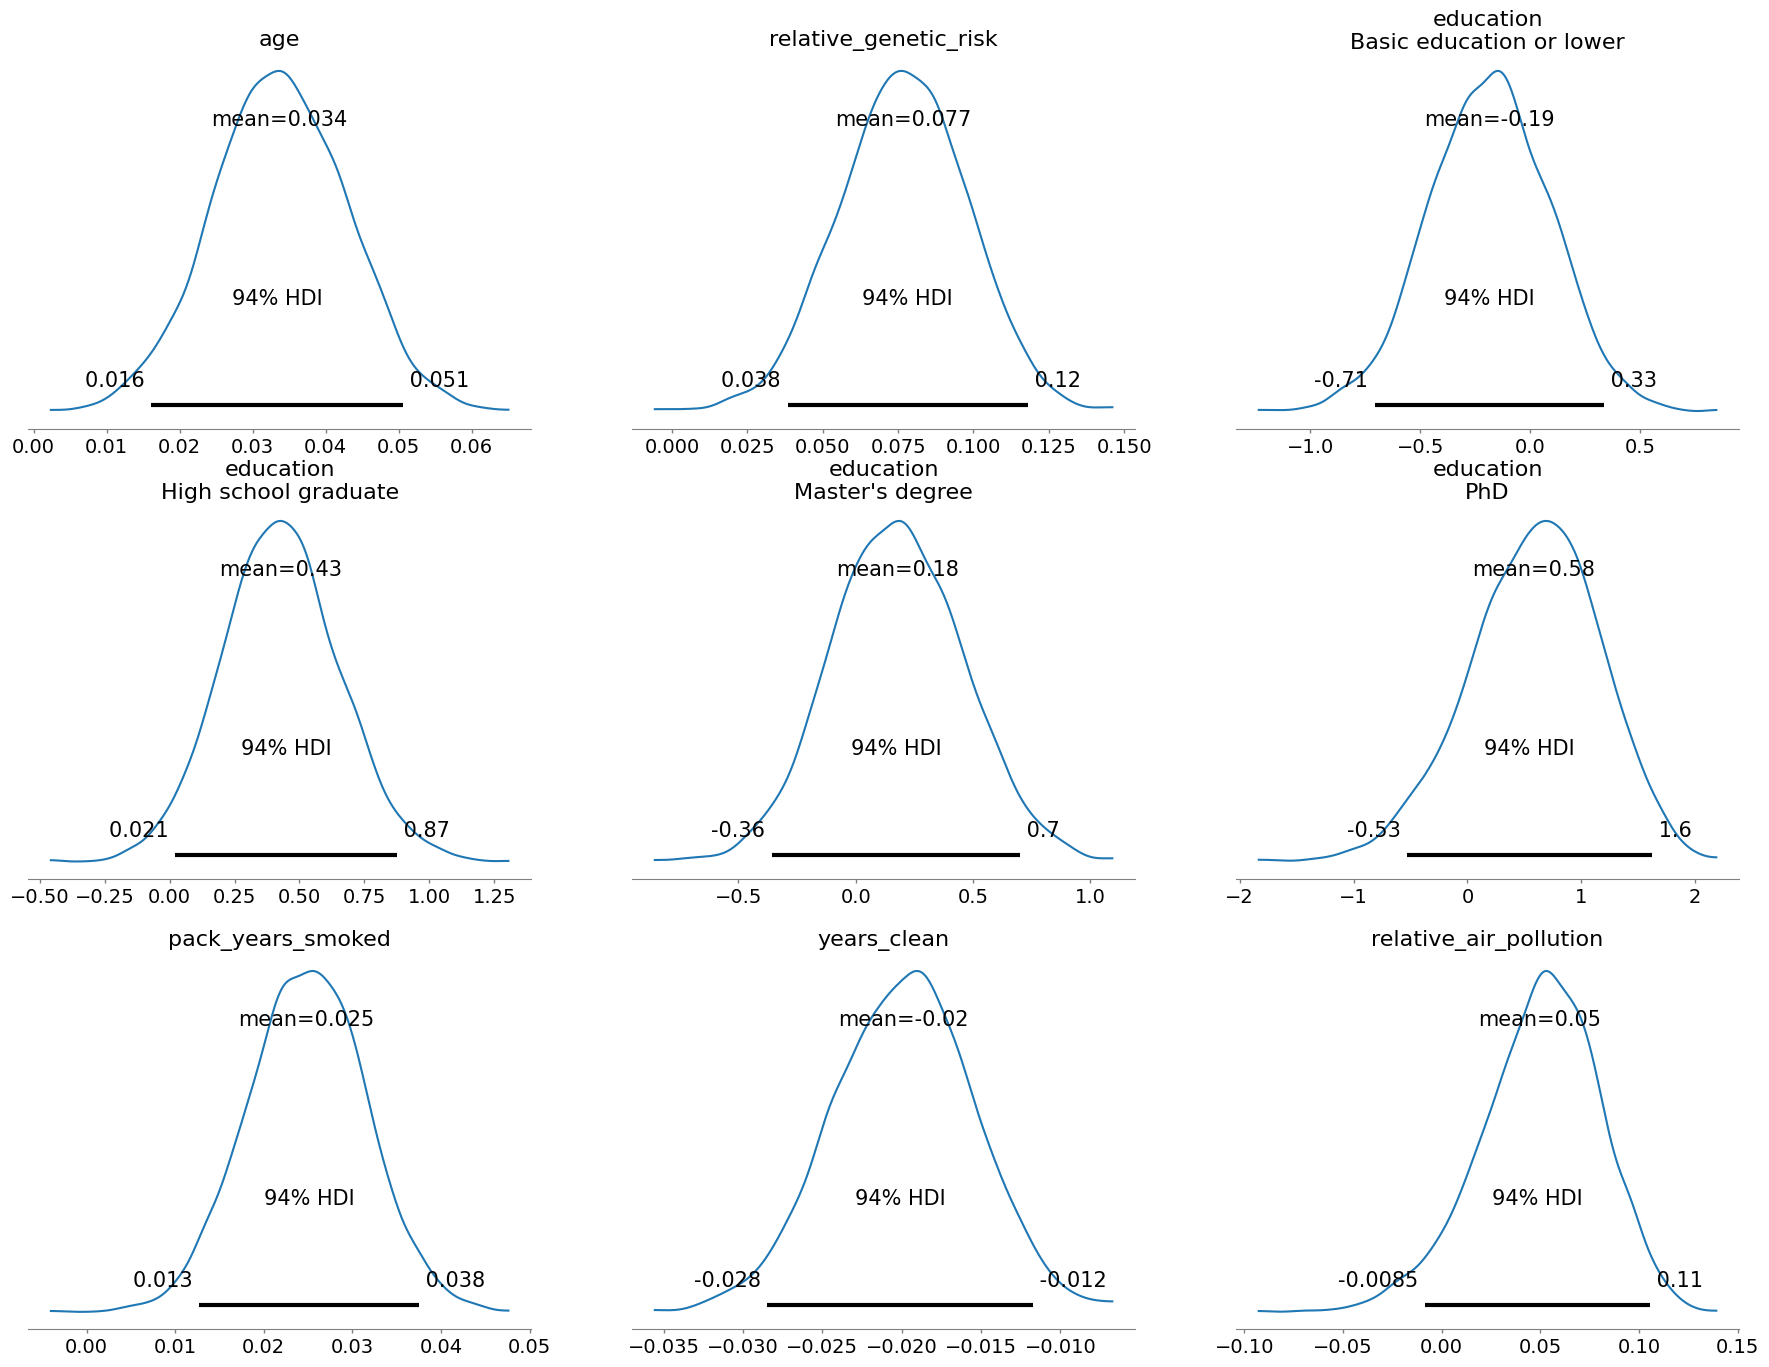

In [25]:
pm.plot_posterior(result, var_names=["age", "relative_genetic_risk","education","pack_years_smoked", "years_clean", "relative_air_pollution"])